In [34]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
import time
from keras.preprocessing import image as img


In [6]:
model_path = './models/model1.h5'
model_weights_path = './models/weights1.h5'
test_path = 'al_test'


In [10]:
model = load_model(model_path)
model.load_weights(model_weights_path)

In [41]:
img_width, img_height = 150, 150
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from cycler import cycler
from PIL import Image, ImageEnhance


#Prediction Function
def predict(file):
  image = Image.open(file)

  img = np.asarray(image)
  plt.imshow(img)
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x1=img_to_array(x)/255
  x1=np.expand_dims(x1,axis=0)
  x = np.expand_dims(x, axis=0)
  array = model.predict( x, batch_size=16, verbose=0)
  x=x.astype('float32')
  print(np.round(model.predict_proba(x1)*100,1))
  
  result = array[0]
  print(result)
  answer = np.argmax(result)


  return answer

al_test/swa2.jpg
[[ 4.9  5.7  0.5 19.5  0.4  6.5  1.2 61.2]]
[0. 0. 0. 0. 0. 0. 0. 1.]
 
al_test/swa1.jpg
[[ 4.6  5.9  0.4 20.9  0.4  6.2  1.2 60.5]]
[0. 0. 0. 0. 0. 0. 0. 1.]
 
al_test/swami1.jpeg
[[ 5.4 64.   1.   0.2  0.8  2.4  0.4 25.8]]
[0.0000000e+00 9.9940073e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 5.9923902e-04]
 
al_test/jub.jpeg
[[ 4.6  1.9  5.8  6.4  4.8 72.9  1.3  2.2]]
[0. 0. 0. 0. 0. 1. 0. 0.]
 
al_test/air3.jpg
[[ 0.  99.7  0.   0.2  0.   0.   0.   0. ]]
[0. 1. 0. 0. 0. 0. 0. 0.]
 
al_test/air.jpeg
[[ 0.1 97.5  0.1  1.3  0.   0.8  0.1  0.1]]
[0. 1. 0. 0. 0. 0. 0. 0.]
 
al_test/air2.jpg
[[  0. 100.   0.   0.   0.   0.   0.   0.]]
[0. 1. 0. 0. 0. 0. 0. 0.]
 
al_test/jub1.jpg
[[ 0.   0.3  0.  99.3  0.   0.4  0.   0. ]]
[0. 0. 0. 1. 0. 0. 0. 0.]
 
al_test/swa.jpeg
[[ 3.2  6.8  0.2 71.6  0.4 11.6  2.1  4.1]]
[0. 0. 0. 1. 0. 0. 0. 0.]
 
al_test/air1.jpg
[[ 0.  99.9  0.   0.   0.   0.   0.   0. ]]
[0. 1. 0. 0. 0. 0. 0. 0.]
 
al_test/jub2.jpg
[

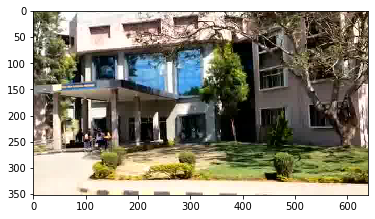

In [42]:
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    result = predict(ret[0] + '/' + filename)
    print(" ")

[0. 1. 0. 0. 0. 0. 0.]
Predicted: chair


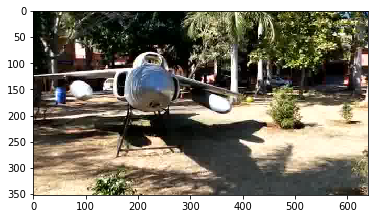

In [39]:
result = predict('0461.jpg')

In [37]:
answer

NameError: name 'answer' is not defined

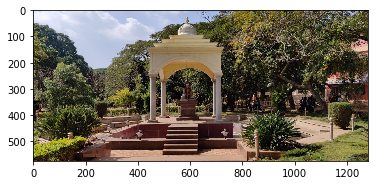

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from cycler import cycler
from PIL import Image, ImageEnhance

# Loads the image then enhances it
image = Image.open('swa.jpeg')

img = np.asarray(image)
plt.imshow(img)

In [16]:
import numpy as np
from keras.preprocessing import image

test_image_luna=image.load_img('swa.jpeg',target_size=(150,150))
test_image2=image.img_to_array(test_image_luna)
test_image2=np.expand_dims(test_image2,axis=0)
luna=model.predict(test_image2)

print(luna)

[[0. 0. 0. 1. 0. 0. 0. 0.]]


In [17]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen=ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('swa.jpeg',
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='categorical')

predicted_probabilities = model.predict_generator('ran.jpg')
print(predicted_probabilities)

NotADirectoryError: [Errno 20] Not a directory: 'swa.jpeg'

In [26]:
import numpy as np
from keras.preprocessing import image

test_image_luna = image.load_img('ran.jpg', target_size=(150,150))
test_image2 = image.img_to_array(test_image_luna)/255.
test_image2 = np.expand_dims(test_image2, axis=0)
luna = model.predict_proba(test_image2)

In [30]:
print(luna)
print(np.round(luna*100,1))


[[0.02557874 0.03126714 0.01718459 0.26375154 0.02461942 0.6205441
  0.01456479 0.00248978]]
[[ 2.6  3.1  1.7 26.4  2.5 62.1  1.5  0.2]]


In [31]:
print(np.round(luna*100,1))


[[ 2.6  3.1  1.7 26.4  2.5 62.1  1.5  0.2]]
